In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
plt.style.use('fivethirtyeight')

# HW_05 - Customer wait time

In the [waiting for bus](./bus_wait.ipynb) example, we saw a difference between how long we expect the bus interval to be vs how long we _experience_ a bus interval to be. 

Now, consider creating parts on demand for customers. We'll take an example of [folding a paper airplane](https://hackmd.io/@cooperrc/HkISHYNrC/edit). We need some data to start:

1. Follow the paper airplane instructions and make one airplane
2. Edit the instructions to make it easier to follow
3. With your new process: time yourself making one airplane at-a-time and make 5 or 6 airplanes
4. With one hand, try to make a paper airplane and time the process (time process this at least 2 times)

## What is this data meant to show

We, engineers, often prescribe processes and procedures that seem to make sense, but can ignore the people that need to do the work. The process of create-try-edit-repeat should be an integral part of your writing and design process. The one-handed folding procedure could simulate many scenarios:
- someone multitasking
- someone with an injury/unuseable hand
- anything else?

When we consider a process, its important to think about the different people that are required to make the process happen. 

## Next steps

With your times recorded, you can use the average and standard deviations to find the times when parts will be ready as a function of time. Use the difference between the predicted and observed cumulative distribution functions to  predict how long your customers will have to wait on paper airplanes. 

In [36]:
N_assemblies = 7


part_times = [3.25, 1.75, 1.25, 1, 1, 2.5, 2.5]
print(part_times)

'''
3m12s
1m 39s
1m 12s
1m06s
1m 02s

2m24s
2m 32s'''

[3.25, 1.75, 1.25, 1, 1, 2.5, 2.5]


'\n3m12s\n1m 39s\n1m 12s\n1m06s\n1m 02s\n\n2m24s\n2m 32s'

0.8112726208286104
[2.14006577 1.04914651 2.50167765 2.65591155 0.31003571 0.83643456
 1.99657056]


Text(0.5, 0, 'time between parts (min)')

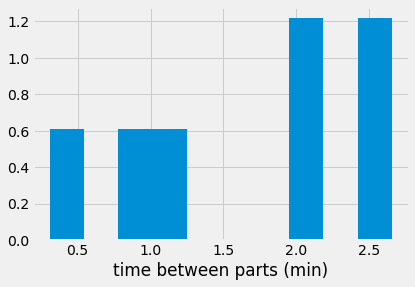

In [43]:
rng = default_rng(42)

std_part_time = np.std(part_times)
average_part_time = np.mean(part_times)
print(std_part_time)

part_times_normal= [0,0,0,0,0,0,0]

part_times_normal += rng.normal(loc = average_part_time, 
                         scale = std_part_time, 
                         size = N_assemblies)

print(part_times_normal)


plt.hist(part_times_normal, density=True)
plt.xlabel('time between parts (min)')

Text(0.5, 0, 'minutes between parts')

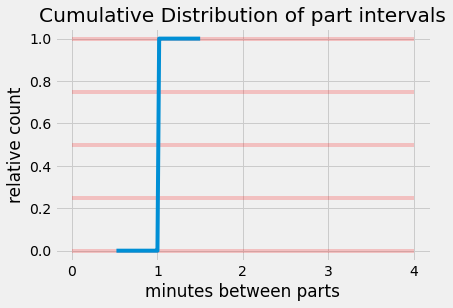

In [48]:
part_time_diff = np.diff(part_ready)

count, bins_count = np.histogram(part_time_diff, bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf) 
plt.plot(bins_count[1:], cdf)
plt.hlines([0, 0.25, 0.5, 0.75, 1], 
           0, 
           4, 
          alpha = 0.2, 
          colors = 'r')
plt.title('Cumulative Distribution of part intervals')
plt.ylabel('relative count')
plt.xlabel('minutes between parts')

In [49]:
num_people = 500
people_arrival = rng.random(num_people)*N_assemblies

In [50]:
person_wait = np.zeros(len(people_arrival))
obs_part_interval = np.zeros((len(part_ready), 2))
for i, part_time in enumerate(part_ready[:-1]):
    people_get_part = np.size(people_arrival[
        np.logical_and(people_arrival>=part_time,
                       people_arrival<part_ready[i+1])])
    obs_part_interval[i, 0] = part_ready[i+1] - part_time
    obs_part_interval[i, 1] = people_get_part

In [51]:
obs_part_interval = obs_part_interval[obs_part_interval[:, 0].argsort()]

Text(0.5, 0, 'minutes between parts')

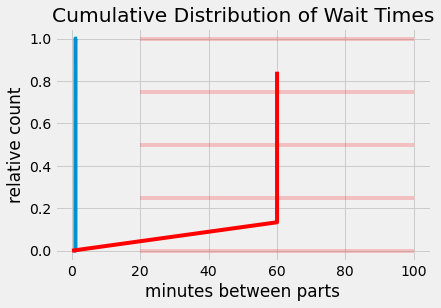

In [52]:
plt.plot(bins_count[1:], 
         cdf,
         label = 'CDF measured'
        )

cdf_obs = np.cumsum(obs_part_interval[:, 1])/num_people

plt.plot(obs_part_interval[:, 0]*60, 
         cdf_obs, 
         'r-',
        label = 'CDF observed')

plt.hlines([0, 0.25, 0.5, 0.75, 1], 
           20, 
           100, 
          alpha = 0.2, 
          colors = 'r')
plt.title('Cumulative Distribution of Wait Times')
plt.ylabel('relative count')
plt.xlabel('minutes between parts')

### User-Centric Engineering Processes in Design Report

Engineering often prioritizes technical efficiency and theoretical models, which can overlook crucial human interactions in practical applications. This gap is evident in a simple but revealing experiment with paper airplanes, where altering the task under various constraints uncovers broader implications.

The experiment begins with following a set of instructions to make a paper airplane, followed by revisions to enhance clarity and ease. After making and timing five to six airplanes using the refined process, the task repeats under a significant constraint: folding the airplanes with just one hand. This modification simulates real-life challenges such as multitasking or physical impairments, directly impacting a worker's ability to perform tasks efficiently.

These exercises are more than just tests of manual dexterity; they mirror real-life scenarios that workers might encounter, emphasizing the importance of the create-try-edit-repeat cycle in process design. By refining procedures based on direct feedback and experience, processes become more inclusive and practical.

Recording the times for these exercises provides crucial data. Folding times recorded during the two-handed folding process were 3 minutes 12 seconds, 1 minute 39 seconds, 1 minute 12 seconds, 1 minute 6 seconds, and 1 minute 2 seconds. These varied times, with an average around two minutes, allow engineers to model the predictability and efficiency of task completion times. When folding with one hand, times increased to 2 minutes 24 seconds and 2 minutes 32 seconds, indicating how physical constraints can affect performance.

Using cumulative distribution functions (CDFs) offers a graphical representation of part completion intervals. The experiment included plotting the predicted CDF based on a normal distribution model against the observed CDF derived from actual data. This comparison helps identify discrepancies and guide further refinements to the process.

Introducing constraints like folding with one hand highlights the need for designs that accommodate a broader range of abilities. It emphasizes the crucial aspect of engineering: considering the end-user. Designs must solve technical problems while enhancing people's ability to interact effectively and comfortably with the solutions.

The paper airplane folding experiment underscores a fundamental principle in engineering design: the importance of considering the human factor in process development. It reveals that theoretical efficiency can lead to different practical outcomes. Engineers must understand the human context in which their creations operate, ensuring designs are not only technically sound but also universally beneficial.

By incorporating this holistic approach, engineers ensure their designs are robust, user-friendly, and adaptable to diverse user needs. Embracing comprehensive design thinking not only leads to better systems but also fosters innovation and inclusivity, proving indispensable in practical applications. This method ensures that engineering solutions are effective in real-world settings, meeting the diverse requirements of all users and making processes more accessible and efficient.